# [Students] Shopee Code League - Order Brushing
Detecting abnormal user behaviour

Hendrik Lesmana

### Task
1. Identify all shops that are deemed to have conducted order brushing.
2. For each shop that is identified to have conducted order brushing, identify the buyers suspected to have conducted order brushing for that shop.


### Basic Concepts
- Each orderid represents a distinct transaction on Shopee.
- Each unique shopid is a distinct seller on Shopee.
- Each unique userid is a distinct buyer on Shopee.
- Event Time refers to the exact time that an order was placed on Shopee.

Concentrate rate is a possible measure that we use to determine whether a shop is likely to have conducted order brushing. For this question, the threshold for concentrate rate is 3. Any concentrate rate value equal to or greater than 3 is deemed to be an occurence of order brushing.

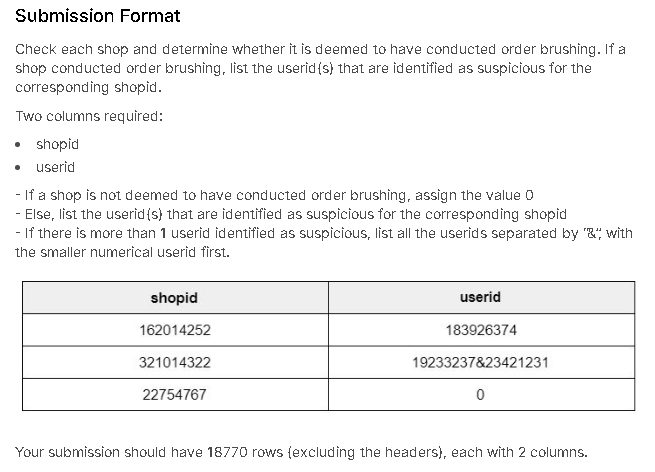

https://www.kaggle.com/c/students-order-brushing-1

### Order Brushing(Background)
E-commerce sites, rate sellers by multiple criteria and display these seller ratings to customers. Since a good rating can boost sales, these ratings are very important to sellers. The number of items sold is usually an important factor in that rating. Brushing consists of generating fake orders to boost the rating. A seller can do this by paying someone a small amount to place a fake order, or just using another person's information to place an order themselves

Source: https://en.wikipedia.org/wiki/Brushing_(e-commerce)

In [260]:
import pandas as pd
import numpy as np

In [261]:
data = pd.read_csv('order_brush_order.csv')

In [262]:
data.head()

,orderid,shopid,userid,event_time
0,31076582227611,93950878,30530270,2019-12-27 00:23:03
1,31118059853484,156423439,46057927,2019-12-27 11:54:20
2,31123355095755,173699291,67341739,2019-12-27 13:22:35
3,31122059872723,63674025,149380322,2019-12-27 13:01:00
4,31117075665123,127249066,149493217,2019-12-27 11:37:55


In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222750 entries, 0 to 222749
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   orderid     222750 non-null  int64 
 1   shopid      222750 non-null  int64 
 2   userid      222750 non-null  int64 
 3   event_time  222750 non-null  object
dtypes: int64(3), object(1)
memory usage: 5.9+ MB


In [264]:
len(data['shopid'].unique())

18770

In [265]:
data['event_time'] = pd.to_datetime(data['event_time'])

In [266]:
data['days'] = data['event_time'].dt.day
#days needed to do groupby as a filter
data.head()

,orderid,shopid,userid,event_time,days
0,31076582227611,93950878,30530270,2019-12-27 00:23:03,27
1,31118059853484,156423439,46057927,2019-12-27 11:54:20,27
2,31123355095755,173699291,67341739,2019-12-27 13:22:35,27
3,31122059872723,63674025,149380322,2019-12-27 13:01:00,27
4,31117075665123,127249066,149493217,2019-12-27 11:37:55,27


In [267]:
data_grouped = data.groupby(['shopid','userid','days']).count()[['orderid']]
#by making groupby with days, we can see order brushing in a day
data_grouped

orderid
shopid    userid    days         
10009     196962305 27          1
10051     2854032   27          1
          48600461  29          1
10061     62464559  31          1
          130633421 30          1
...                           ...
214949521 46269178  31          2
214964814 200983383 29          1
215175775 13688804  31          1
          129266028 31          1
215435223 79515106  31          1

[212210 rows x 1 columns]

Grouped sales by shopid followed by userid and days will show orderid/count ordered by multiple users from a shop which is represents as shopid.

shopid in the table are show as unique shopid

In [268]:
data_grouped = data_grouped.reset_index()
data_grouped

,shopid,userid,days,orderid
0,10009,196962305,27,1
1,10051,2854032,27,1
2,10051,48600461,29,1
3,10061,62464559,31,1
4,10061,130633421,30,1
...,...,...,...,...
212205,214949521,46269178,31,2
212206,214964814,200983383,29,1
212207,215175775,13688804,31,1
212208,215175775,129266028,31,1


By using reset_index() it will set the indices in order, starting from 0, and make it easier to work with the dataframe

With this formula, the data will displayed clealy(shopid will be in an adjacent position). With this, I can retrieve the userid data suspected of doing order brushing.

In [269]:
data_grouped.rename(columns={'orderid':'n_order'}, inplace=True)

To make it more easy, rename the orderid into n_order(number of order). Because of the grouping and count orderid, the orderid became the count of the orders

In [270]:
data_grouped.head()

,shopid,userid,days,n_order
0,10009,196962305,27,1
1,10051,2854032,27,1
2,10051,48600461,29,1
3,10061,62464559,31,1
4,10061,130633421,30,1


<Figure size 800x400 with 0 Axes>

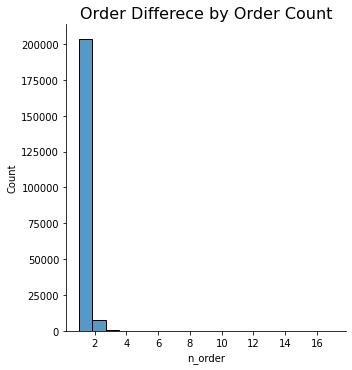

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4), dpi=100)
sns.displot(data_grouped['n_order'])
plt.title('Order Differece by Order Count',fontsize=16)
plt.show()

Based on the graph, most of customers had ordered in range 1, 2, to three orders

In [272]:
import statistics

print("Median of n_order is % s"
     %(data_grouped['n_order'].median()))
print("Mean of n_order is % s"
     %(data_grouped['n_order'].mean()))
print("Standard Deviation of n_order is % s"
     %(statistics.stdev(data_grouped['n_order'])))
print("Mean + (3*Standard Deviation) of n_order is % s"
     %((statistics.stdev(data_grouped['n_order'])*3) + data_grouped['n_order'].mean()))

Median of n_order is 1.0
Mean of n_order is 1.0496677819141416
Standard Deviation of n_order is 0.2766929088798188
Mean + (3*Standard Deviation) of n_order is 1.8797465085535978


Do a simple analyst using statistics:
- Median is a measure to avoid outliers data, median of n_order is 1
- Mean of n_order is 1.04
- Standard Deviation of n_order is 0.2

I can say that, besides of the outliers. most of the n_order is in range 1.
- Mean + (3*Standard Deviation) formula is used to exclude the normal orders(there's no way, each customer only order 1 item. So, to make sure not to make an error asumption, i used the formula to extend the range of the normal order)

The result is 1.87, rounded to be 2. Meaning that n_order more than 2 can be a "suspect" of the order brushing.

In [273]:
suspect = data_grouped[data_grouped['n_order'] > 2].sort_values(by=['shopid','n_order'], ascending=False)

In [274]:
suspect.head()

,shopid,userid,days,n_order
212107,213141071,213646699,27,3
212061,212089630,105664365,31,3
211846,210197928,52867898,27,4
211695,209326384,7794832,31,3
211221,208696908,214111334,30,4


In [275]:
output = {
    'shopid':[],
    'userid':[]
}

Make a variable to store temporary data to make it easier if something goes wrong. If I applied wrong formula, I can delete the temporary storage and make a new temporary storage without affecting the main data.

In [276]:
shopid = -1
sellers = []
users = []
for i in suspect[['shopid','userid']].iterrows():
    if i[1][0] != shopid:
        if shopid != -1:
            sellers.append(shopid)
            users.append(userid)
        shopid = i[1][0]
        userid = str(i[1][1])
    else :
        userid += '&'+str(i[1][1])
#the purpose of this formula is to make lists based on data.
#iterrows needed to avoid for data of a certian size(million)

the purpose of this formula is to make lists based on data.
- Shopid = -1 is just a dummy data which is used to help me do If Else Method

In [277]:
output['shopid'] = output['shopid'] + sellers
output['userid'] = output['userid'] + users

In [278]:
len(output['shopid'])

524

- There're 524 as a total of unique suspects(shopid)

In [280]:
for seller in set(data.set_index('shopid').drop(output['shopid'], axis=0).index):
    output['shopid'].append(seller)
    output['userid'].append(0)

Do inner join of 2 datasets
- First dataset is "output" which is a temporary storage I created earlier
- Second dataset is data which shows all data (without filter) 

With inner join, I can get which one is the suspects of the Order Brushing represents by showing userid data and which one is not represents as 0 in the userid

In [281]:
len(output['shopid'])

18770

In [282]:
len(output['userid'])

18770

In [283]:
submission = pd.DataFrame(output)

In [284]:
submission

,shopid,userid
0,213141071,213646699
1,212089630,105664365
2,210197928,52867898
3,209326384,7794832
4,208696908,214111334
...,...,...
18765,52494327,0
18766,146833400,0
18767,42303483,0
18768,182910973,0
